In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [6]:
import os

os.listdir("Enrolment")


['api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [7]:
enrol_files = os.listdir("Enrolment")

enrol_list = []

for file in enrol_files:
    df = pd.read_csv(os.path.join("Enrolment", file))
    enrol_list.append(df)

enrol = pd.concat(enrol_list, ignore_index=True)


In [8]:
enrol.shape


(1006029, 7)

In [9]:
enrol.columns.tolist()


['date',
 'state',
 'district',
 'pincode',
 'age_0_5',
 'age_5_17',
 'age_18_greater']

In [10]:
demo_files = os.listdir("Demographic")

demo_list = []

for file in demo_files:
    df = pd.read_csv(os.path.join("Demographic", file))
    demo_list.append(df)

demo = pd.concat(demo_list, ignore_index=True)


In [11]:
demo.shape


(2071700, 6)

In [12]:
demo.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [13]:
demo.columns.tolist()


['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

In [14]:
bio_files = os.listdir("Biometric")

bio_list = []

for file in bio_files:
    df = pd.read_csv(os.path.join("Biometric", file))
    bio_list.append(df)

bio = pd.concat(bio_list, ignore_index=True)


In [15]:
bio.shape


(1861108, 6)

In [16]:
bio.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [17]:
bio.columns.tolist()


['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

In [18]:
# Standardize Enrolment columns
enrol = enrol.rename(columns={
    'age_18_greater': 'age_18_plus'
})

# Standardize Demographic columns
demo = demo.rename(columns={
    'demo_age_17_': 'demo_age_18_plus'
})

# Standardize Biometric columns
bio = bio.rename(columns={
    'bio_age_17_': 'bio_age_18_plus'
})


In [19]:
enrol.columns.tolist()
demo.columns.tolist()
bio.columns.tolist()


['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_18_plus']

In [20]:
# Total enrolments per record
enrol['total_enrolment'] = (
    enrol['age_0_5'] +
    enrol['age_5_17'] +
    enrol['age_18_plus']
)

# Total demographic updates per record
demo['total_demo_update'] = (
    demo['demo_age_5_17'] +
    demo['demo_age_18_plus']
)

# Total biometric updates per record
bio['total_bio_update'] = (
    bio['bio_age_5_17'] +
    bio['bio_age_18_plus']
)


In [21]:
enrol[['age_0_5','age_5_17','age_18_plus','total_enrolment']].head()


,age_0_5,age_5_17,age_18_plus,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [22]:
# Aggregate enrolment
enrol_state_date = enrol.groupby(
    ['state', 'date'], as_index=False
)['total_enrolment'].sum()

# Aggregate demographic updates
demo_state_date = demo.groupby(
    ['state', 'date'], as_index=False
)['total_demo_update'].sum()

# Aggregate biometric updates
bio_state_date = bio.groupby(
    ['state', 'date'], as_index=False
)['total_bio_update'].sum()


In [23]:
enrol_state_date.head()


,state,date,total_enrolment
0,100000,02-09-2025,3
1,100000,03-09-2025,1
2,100000,08-09-2025,1
3,100000,09-09-2025,1
4,100000,11-09-2025,2


In [24]:
demo_state_date.head()


,state,date,total_demo_update
0,100000,20-12-2025,1
1,100000,23-12-2025,1
2,Andaman & Nicobar Islands,01-09-2025,18
3,Andaman & Nicobar Islands,01-11-2025,10
4,Andaman & Nicobar Islands,01-12-2025,18


In [25]:
bio_state_date.head()


,state,date,total_bio_update
0,Andaman & Nicobar Islands,01-03-2025,209
1,Andaman & Nicobar Islands,01-04-2025,184
2,Andaman & Nicobar Islands,01-05-2025,180
3,Andaman & Nicobar Islands,01-06-2025,140
4,Andaman & Nicobar Islands,01-07-2025,259


In [26]:
# Merge enrolment with demographic updates
merged = pd.merge(
    enrol_state_date,
    demo_state_date,
    on=['state', 'date'],
    how='left'
)

# Merge with biometric updates
merged = pd.merge(
    merged,
    bio_state_date,
    on=['state', 'date'],
    how='left'
)


In [27]:
merged.head()


,state,date,total_enrolment,total_demo_update,total_bio_update
0,100000,02-09-2025,3,NaN,NaN
1,100000,03-09-2025,1,NaN,NaN
2,100000,08-09-2025,1,NaN,NaN
3,100000,09-09-2025,1,NaN,NaN
4,100000,11-09-2025,2,NaN,NaN


In [28]:
merged.isna().sum()


state                  0
date                   0
total_enrolment        0
total_demo_update    557
total_bio_update     666
dtype: int64

In [29]:
# Replace missing update values with 0
merged['total_demo_update'] = merged['total_demo_update'].fillna(0)
merged['total_bio_update'] = merged['total_bio_update'].fillna(0)

# Calculate Update Stress Index
merged['update_stress_index'] = (
    (merged['total_demo_update'] + merged['total_bio_update']) /
    merged['total_enrolment']
)


In [30]:
merged[['state','date','total_enrolment','total_demo_update','total_bio_update','update_stress_index']].head()


,state,date,total_enrolment,total_demo_update,total_bio_update,update_stress_index
0,100000,02-09-2025,3,0.0,0.0,0.0
1,100000,03-09-2025,1,0.0,0.0,0.0
2,100000,08-09-2025,1,0.0,0.0,0.0
3,100000,09-09-2025,1,0.0,0.0,0.0
4,100000,11-09-2025,2,0.0,0.0,0.0


In [31]:
# Calculate average Update Stress Index per state
state_stress = (
    merged
    .groupby('state', as_index=False)['update_stress_index']
    .mean()
    .sort_values(by='update_stress_index', ascending=False)
)

state_stress.head(10)


,state,update_stress_index
23,Karnataka,162.956682
41,Tamil Nadu,125.470484
28,Maharashtra,93.358563
24,Kerala,66.095455
16,Gujarat,59.807988
3,Andhra Pradesh,56.405492
42,Telangana,47.406218
38,Punjab,46.419502
29,Manipur,40.895470
8,Chhattisgarh,39.353874


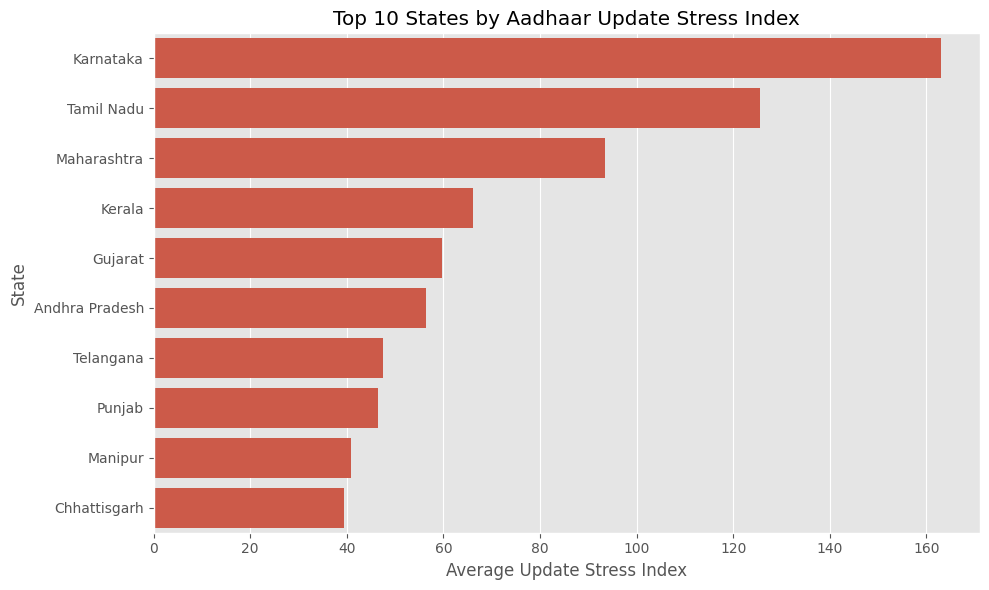

In [32]:
# Plot top 10 states by Update Stress Index
top10 = state_stress.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    x='update_stress_index',
    y='state'
)

plt.title('Top 10 States by Aadhaar Update Stress Index')
plt.xlabel('Average Update Stress Index')
plt.ylabel('State')

plt.tight_layout()
plt.show()


In [33]:
# National age-wise totals
age_summary = pd.DataFrame({
    'Age Group': ['0–5', '5–17', '18+'],
    'Enrolment': [
        enrol['age_0_5'].sum(),
        enrol['age_5_17'].sum(),
        enrol['age_18_plus'].sum()
    ],
    'Demographic Updates': [
        0,  # demographic updates start after age 5
        demo['demo_age_5_17'].sum(),
        demo['demo_age_18_plus'].sum()
    ],
    'Biometric Updates': [
        0,  # biometric updates start after age 5
        bio['bio_age_5_17'].sum(),
        bio['bio_age_18_plus'].sum()
    ]
})

age_summary


,Age Group,Enrolment,Demographic Updates,Biometric Updates
0,0–5,3546965,0,0
1,5–17,1720384,4863424,34226855
2,18+,168353,44431763,35536240


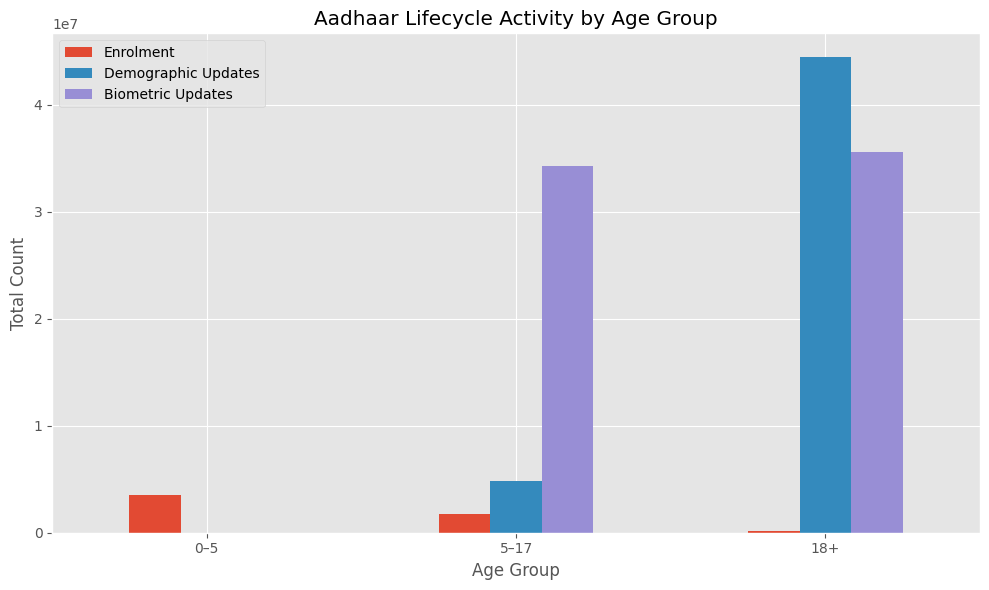

In [34]:
# Prepare data for plotting
age_plot = age_summary.set_index('Age Group')

age_plot.plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Aadhaar Lifecycle Activity by Age Group')
plt.ylabel('Total Count')
plt.xlabel('Age Group')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
